# Regression Lab

Now have all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate model loss. 

## SWBAT

* Run a complete regression analysis through code only. 

## Here are all the formulas to put everything in perspective

#### Slope
<img src="m.png" width = 300>

#### Intercept 
<img src="b.png" width = 200>

#### R-squared
<img src="r2.png" width = 400>

#### Prediction
![](pred.jpg)


Use the functions created earlier to implement these formulas to run a regression analysis using X and Y as input variables. 

In [17]:
!pip install seaborn

    100% |████████████████████████████████| 215kB 17.9MB/s ta 0:00:01
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [204]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import numpy as np

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

def calc_slope(x_lst,y_lst):
    x_mean, y_mean = x_lst.mean(), y_lst.mean()
    xy_bar = (x_lst*y_lst).mean()
    
    numer = x_mean * y_mean - xy_bar
    denom = (x_mean**2 - (x_lst**2).mean())
    return numer / denom

def calc_intercept(x_lst, y_lst):
    y_mean, x_mean = y_lst.mean(), x_lst.mean()
    
    return y_mean - calc_slope(x_lst,y_lst) * x_mean

def get_predicted_vals(x_lst,m,b):
    pred_lst = []
    for val in x_lst:
        pred_lst.append(val*m + b)
    return list(pred_lst)

def get_diff_sq(y_lst,comp_var):
    arr = []
    if type(comp_var) == np.float64:
        comp_var = np.array([comp_var for v in y_lst])
    for y_i,y_second in list(zip(y_lst, comp_var)):
        arr.append(y_i - y_second)
    return np.array(arr)**2


def calc_r_squared(x_lst, y_lst):
    b = calc_intercept(x_lst,y_lst)
    m = calc_slope(x_lst,y_lst)
    
    y_pred_lst = get_predicted_vals(x_lst,m,b)
    SS_Res = sum(get_diff_sq(y_lst,y_pred_lst))
    SS_Tot = sum(get_diff_sq(y_lst, y_lst.mean()))

    return 1 - SS_Res/SS_Tot

def gather_lin_reg_info(X,Y):
    lin_dict = {
        'm': round(calc_slope(X,Y),2),
        'b': round(calc_intercept(X,Y),2),
        'r_sq': np.round(calc_r_squared(X,Y),2)
    }
    return lin_dict

def plot_reg(x_lst,y_lst,pred_dict,x_new=None,y_new=None):
    plt.style.use('ggplot')
    plt.scatter(x_lst,y_lst, color='#003F72', label='data')

    plt.plot(np.array(list(x_lst)),pred_dict['b'] + np.array(list(x_lst))*pred_dict['m'],color='red',label='reg line')
    return None
    if x_new:
        plt.scatter(x_new,y_new,color='r',label='Prediction: '+str(np.round(y_new,1)))
    
    plt.legend(loc=4)
    plt.show()
    return None

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


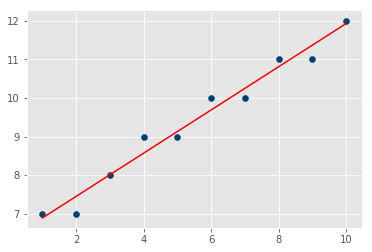

In [205]:
lin_reg_dict = gather_lin_reg_info(X,Y)

print('Basic Regression Diagnostics')
print('----------------------------')
print('Slope: '+str(lin_reg_dict['m']))
print('Y-Intercept: '+str(lin_reg_dict['b']))
print('R-Squared: '+str(lin_reg_dict['r_sq']))
print('----------------------------')
print('Model: Y = '+str(lin_reg_dict['m']) + ' * X + '+str(lin_reg_dict['b']))

plot_reg(X,Y,lin_reg_dict)


## Make Predictions

Predict and plot the value of y using regression line above for a new value of x = 4.5.

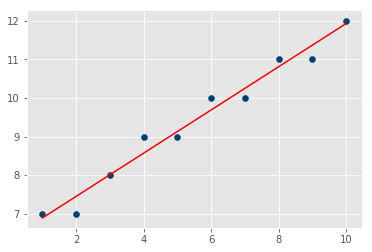

In [206]:
# Make prediction using given value and visualize on the scatter plot
x_new = 4.5
y_new = (lin_reg_dict['m']*x_new) + lin_reg_dict['b']

plot_reg(X,Y,lin_reg_dict, x_new,y_new)


## Level up - Optional 
Load the "heightWeight.csv" dataset. Use the height as an independant and weight as a dependant variable and draw a regression line to data using your code above. Calculate your R-square for the model and try to predict new values of Y. 

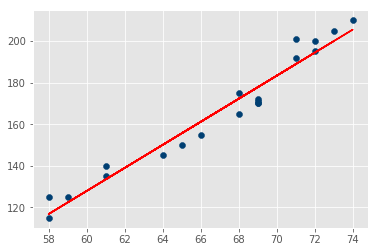

In [208]:
doc = pd.read_csv('heightWeight.csv')
x_height = doc.height
y_weight = doc.Weight

x_new2 = 60
y_new2 = (lin_reg_dict['m']*x_new2) + lin_reg_dict['b']

lin_reg_dict2 = gather_lin_reg_info(x_height,y_weight)
plot_reg(x_height,y_weight,lin_reg_dict2,x_new2,y_new2)

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next We shall see how we can use python's built in modules to perform such analyses with a much higher level of sophistication. 